In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset

df = pd.read_csv("lib.csv")

# Display the first few rows of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Display initial statistics
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values for 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing values for 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Check the DataFrame after handling missing values
print("DataFrame after handling missing values:\n", df.isnull().sum())

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
DataFrame after handling missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\deoka\AppData\Local\Temp\ipykernel_16644\1485054609.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\deoka\AppData\Local\Temp\ipykernel_16644\1485054609.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

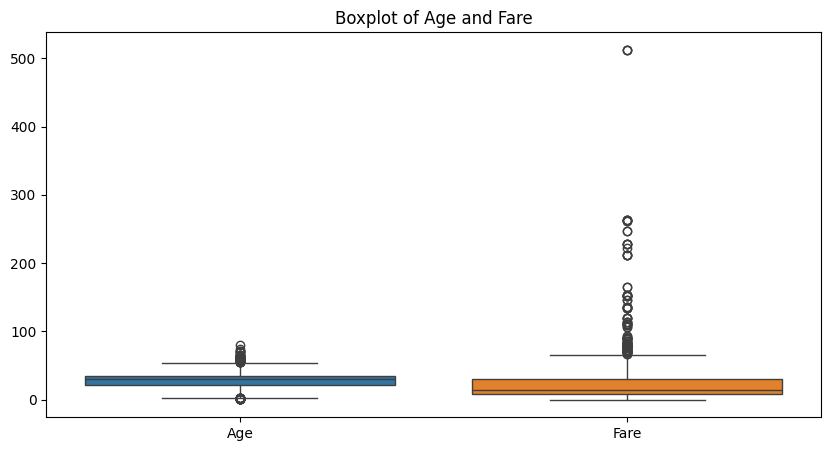

DataFrame shape after removing outliers: (775, 11)


In [5]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

# Removing outliers in 'Fare' (e.g., using IQR method)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Check the shape of the DataFrame after removing outliers
print("DataFrame shape after removing outliers:", df.shape)

In [6]:
# Apply log transformation on 'Fare' to reduce skewness
df['Fare'] = np.log1p(df['Fare'])

# Display the transformed 'Fare'
print("Transformed 'Fare':\n", df['Fare'].head())

Transformed 'Fare':
 0    2.110213
2    2.188856
3    3.990834
4    2.202765
5    2.246893
Name: Fare, dtype: float64


In [7]:
# Convert 'Sex' and 'Embarked' into numerical values
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # C: 0, Q: 1, S: 2

# Display the DataFrame after encoding
print("DataFrame after encoding categorical variables:\n", df.head())

DataFrame after encoding categorical variables:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex        Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1  22.000000      1      0   
2                        Heikkinen, Miss. Laina    0  26.000000      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1      0   
4                      Allen, Mr. William Henry    1  35.000000      0      0   
5                              Moran, Mr. James    1  29.699118      0      0   

             Ticket      Fare  Embarked  
0         A/5 21171  2.110213         2  
2  STON/O2. 3101282  2.188856         2  
3            113803  3.990834         2  
4            373450  2.202765         2  
5            330877  2.246893        